### Descripci√≥n del proyecto
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las rese√±as de usuarios y expertos, los g√©neros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos hist√≥ricos sobre las ventas de juegos est√°n disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene √©xito o no. Esto te permitir√° detectar proyectos prometedores y planificar campa√±as publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y est√°s planeando una campa√±a para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si est√°s pronosticando las ventas de 2017 en funci√≥n de los datos de 2016 o las ventas de 2027 en funci√≥n de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificaci√≥n ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificaci√≥n de software de entretenimiento) eval√∫a el contenido de un juego y asigna una clasificaci√≥n de edad como Adolescente o Adulto.

## 1.1  Prop√≥sito del Proyecto

- identificar patrones que determinen si un juego tiene √©xito o no.
- detectar proyectos prometedores y planificar campa√±as publicitarias.

## 1.2  Inicializaci√≥n

In [1]:
# Cargar todas las librer√≠as

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

## 1.3  Cargar datos

In [2]:
df_games = pd.read_csv('/datasets/games.csv')

## 1.4  Revisar los datos

In [3]:
df_games.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Observaciones 
- Contamos con 10 columnas con informaci√≥n de las ventas de videojuegos de diferentes paises y otras columnas con informaci√≥n util que utilizaremos mas tarde.
- Tenemos tambien algunos valores ausentes especialemte significativos en las columnas "Critic_Score", "User_Score" y "Rating", debemos asegurarnos si es conveninte o no rellenar estos valores ausentes.
- Las columnas tienen nombres en mayusculas, las cuales debemos procesar para hacer nuestro analisis ma eficiente.
- Debemos cambiar algunos tipos de datos como enla columna "Year_of_Release" que su tipo de dato es flotante y nos conviene mas covertirlo en un formato datetime.
- la columna "User_Score" es un tipo de dato object, puede que sea mas conveniente convertirlo en un tipo de dato flotante.


---

#  Preparar los datos

In [5]:
# Paso 1: Reemplazar nombres de columnas con min√∫sculas
df_games.columns = df_games.columns.str.lower()

# Paso 2: Convertir tipos de datos necesarios
# Convertir year_of_release a formato datetime (usaremos solo el a√±o)
df_games['year_of_release'] = pd.to_datetime(df_games['year_of_release'], format='%Y', errors='coerce')

# Convertir user_score a tipo float, manejando posibles valores no num√©ricos
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

# Paso 3: Descripci√≥n de los cambios
print("Cambios realizados:")
print("1. Nombres de columnas convertidos a min√∫sculas.")
print("2. 'year_of_release': Convertido a datetime para facilitar an√°lisis basado en tiempo.")
print("3. 'user_score': Convertido a float para tratar puntuaciones como valores num√©ricos.")

Cambios realizados:
1. Nombres de columnas convertidos a min√∫sculas.
2. 'year_of_release': Convertido a datetime para facilitar an√°lisis basado en tiempo.
3. 'user_score': Convertido a float para tratar puntuaciones como valores num√©ricos.


---

# Trabajemos los valores ausentes

### Posibles columnas afectadas:

- name: Son nombres √∫nicos de juegos. Si est√°n ausentes, no se puede recuperar la informaci√≥n, por lo que se podr√≠an eliminar estas filas.

- year_of_release: Los juegos sin a√±o son dif√≠ciles de analizar cronol√≥gicamente. Podr√≠amos eliminarlos o rellenarlos si encontramos patrones.

- critic_score y user_score: Son datos importantes, pero no siempre est√°n disponibles. Podr√≠amos rellenarlos con valores como la media por g√©nero/plataforma o eliminarlos.

- rating: Clasificaci√≥n ESRB. Si falta, podr√≠a deberse a juegos sin clasificaci√≥n oficial. Podr√≠amos rellenar con "Sin clasificaci√≥n" o dejarlos vac√≠os.

Abreviatura TBD:

En la columna user_score, "TBD" significa "por determinar". Lo trataremos como valores ausentes (NaN) para mantener coherencia.

In [6]:
# Manejo de valores ausentes

# Eliminar filas sin nombre de juego, ya que es informaci√≥n esencial
df_games = df_games.dropna(subset=['name'])

# Rellenar year_of_release con el a√±o m√°s frecuente (moda) como aproximaci√≥n
year_mode = df_games['year_of_release'].mode()[0]
df_games['year_of_release'] = df_games['year_of_release'].fillna(year_mode)

# Rellenar critic_score y user_score con la media por g√©nero como aproximaci√≥n
df_games['critic_score'] = df_games.groupby('genre')['critic_score'].transform(
    lambda x: x.fillna(x.mean())
)
df_games['user_score'] = df_games.groupby('genre')['user_score'].transform(
    lambda x: x.fillna(x.mean())
)

# Rellenar rating con "Sin clasificaci√≥n" para juegos sin una clasificaci√≥n oficial
df_games['rating'] = df_games['rating'].fillna('Sin clasificaci√≥n')

# Manejar "TBD" en user_score, convirti√©ndolos en NaN
df_games['user_score'] = df_games['user_score'].replace('TBD', np.nan)

# Confirmar valores ausentes despu√©s del tratamiento
print(df_games.isnull().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


### Posibles razones de valores ausentes
- critic_score y user_score:
Podr√≠an faltar para juegos menos populares o reci√©n lanzados, ya que no se evaluaron.
- rating:
Algunos juegos pueden no haber solicitado una clasificaci√≥n oficial, especialmente en mercados peque√±os o para plataformas digitales.


---

# Calcular ventas totales

Vamos a calcular las ventas totales de cada juego sumando las ventas en todas las regiones y guardarlas en una nueva columna llamada total_sales.

In [7]:
# Crear una nueva columna con las ventas totales sumando las regiones
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Verificar los resultados (muestra las primeras filas con la nueva columna)
print(df_games[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head())

                       name  na_sales  eu_sales  jp_sales  other_sales  \
0                Wii Sports     41.36     28.96      3.77         8.45   
1         Super Mario Bros.     29.08      3.58      6.81         0.77   
2            Mario Kart Wii     15.68     12.76      3.79         3.29   
3         Wii Sports Resort     15.61     10.93      3.28         2.95   
4  Pokemon Red/Pokemon Blue     11.27      8.89     10.22         1.00   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38  


---

# Analizar los datos

### Juegos lanzados por a√±o

Vamos a analizar la cantidad de juegos lanzados por a√±o y determinar si los datos de cada per√≠odo son significativos.

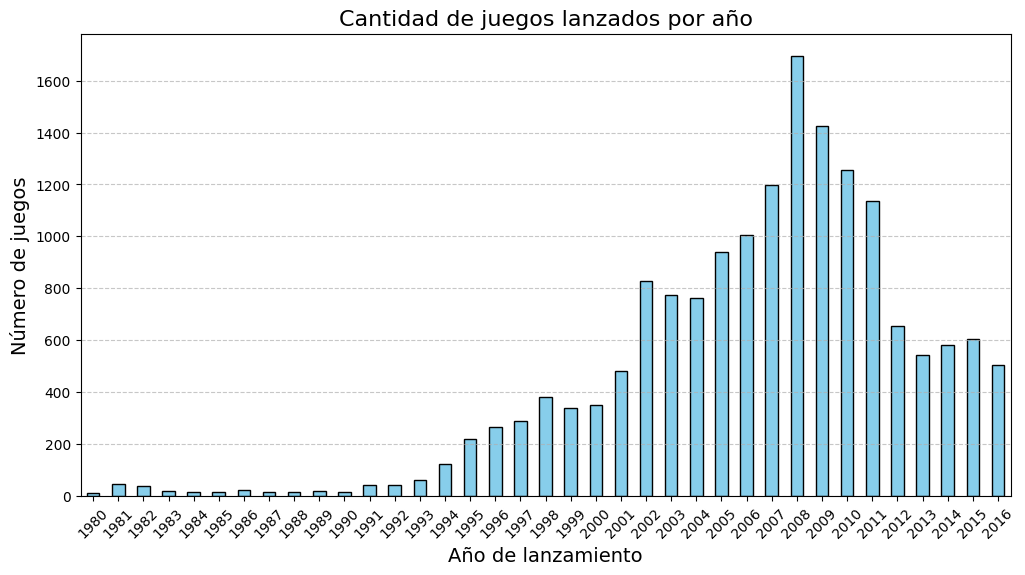

In [8]:
# Contar el n√∫mero de juegos por a√±o de lanzamiento
games_per_year = df_games['year_of_release'].dt.year.value_counts().sort_index()

# Crear un gr√°fico de barras para visualizar los datos
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cantidad de juegos lanzados por a√±o', fontsize=16)
plt.xlabel('A√±o de lanzamiento', fontsize=14)
plt.ylabel('N√∫mero de juegos', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Evaluaci√≥n de datos por per√≠odo
Observaremos el gr√°fico para identificar tendencias como:

- A√±os con muchos lanzamientos (posibles picos en popularidad de videojuegos).
- A√±os con pocos lanzamientos (¬ødatos incompletos?).
- Compararemos la cantidad de lanzamientos por a√±o para decidir si ciertos per√≠odos son significativos o si algunos datos deben ser excluidos.

### Conclusi√≥n
Podemos observar que despues del a√±o 2000 incrementa considerablemente el numero de juegos lanzados, puede deberse a los avances en tecnolog√≠a y gr√°ficos en el desarrollo de videojuegos que a su vez llegron con titulos muy populares. Tambi√©n podemos ver que alcanza su pico maximo en el a√±o 2008.



## Determinar las plataformas con mayores ventas totales

Vamos a abordar esta situaci√≥n paso a paso para analizar c√≥mo var√≠an las ventas entre plataformas, identificar las m√°s exitosas y estudiar el ciclo de vida de las plataformas populares.

Primero, identificaremos las plataformas con las mayores ventas totales acumuladas:

In [9]:
# Calcular las ventas totales por plataforma
platform_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Mostrar las plataformas con mayores ventas totales
top_platforms = platform_sales.head(5)
print("Plataformas con mayores ventas totales:")
print(top_platforms)


Plataformas con mayores ventas totales:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64


### Distribuci√≥n de ventas anuales para las plataformas principales

Construimos un gr√°fico de l√≠neas para visualizar las ventas anuales de las plataformas m√°s populares.

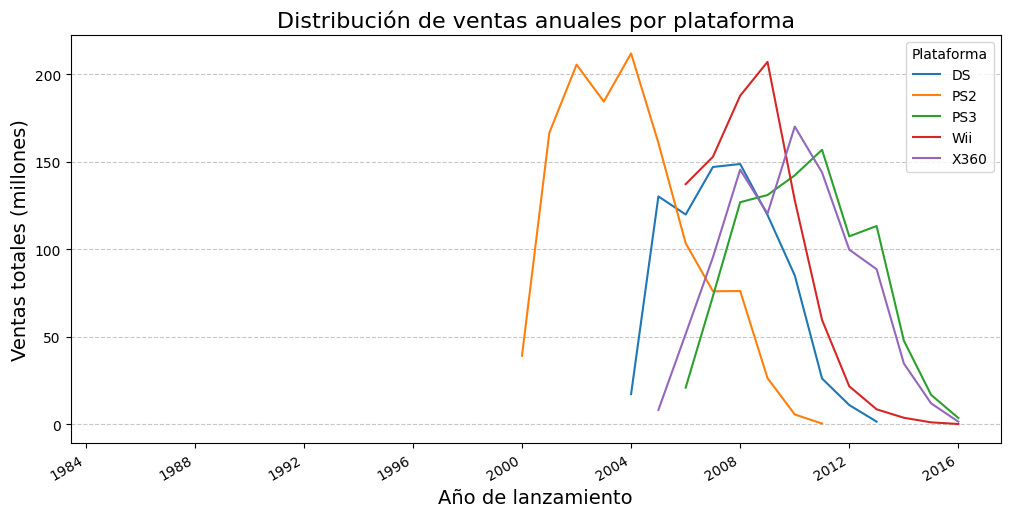

In [10]:
# Filtrar datos solo para las plataformas principales
top_platform_names = top_platforms.index
filtered_data = df_games[df_games['platform'].isin(top_platform_names)]

# Agrupar por a√±o y plataforma para calcular ventas totales anuales
sales_by_year_platform = filtered_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Crear un gr√°fico de l√≠neas
plt.figure(figsize=(12, 6))
sales_by_year_platform.plot(ax=plt.gca())
plt.title('Distribuci√≥n de ventas anuales por plataforma', fontsize=16)
plt.xlabel('A√±o de lanzamiento', fontsize=14)
plt.ylabel('Ventas totales (millones)', fontsize=14)
plt.legend(title='Plataforma', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Conclusi√≥n 
Como er√° de esperarse, el PS2 lider√≥ las ventas desde el a√±o 2000 - 2004, el Nintendo wii tuvo un pico similar en el a√±o 2006 que fue su lanzamiento pero despues de eso tuvo una caida muy abrupta, el X360 tuvo un pico importante en el a√±o 2008 pero no fue hasta alrededor del a√±o 2011 que tuvo su pico mas grande (puede deberse a juegos populares que salieron en ese momento) y el Ps3 empez√≥ a bajar a finales del 2011 pero curiosamente tuvo una subida notable en el a√±o 2012 - 2013 (seguramente tambien por la popularidad de algunos juegos como GTA V o COD Black ops 2)

## Identificar plataformas antiguas y su desaparici√≥n

Buscamos plataformas que tuvieron ventas altas en el pasado pero que ya no registran ventas en los √∫ltimos a√±os.

In [11]:
# Identificar el primer y √∫ltimo a√±o con ventas para cada plataforma
platform_lifecycle = df_games.groupby('platform')['year_of_release'].agg(['min', 'max'])

# A√±adir la duraci√≥n de vida de cada plataforma
platform_lifecycle['lifespan'] = platform_lifecycle['max'] - platform_lifecycle['min']

# Mostrar plataformas que ya no tienen ventas
inactive_platforms = platform_lifecycle[platform_lifecycle['max'] < df_games['year_of_release'].max()]
print("Plataformas populares que ya no tienen ventas:\n", inactive_platforms)

# Calcular tiempo promedio de aparici√≥n y desaparici√≥n
average_lifespan = platform_lifecycle['lifespan'].mean()
print(f"Duraci√≥n promedio de vida de las plataformas: {average_lifespan} a√±os")


Plataformas populares que ya no tienen ventas:
                 min        max   lifespan
platform                                 
2600     1980-01-01 2008-01-01 10227 days
3DO      1994-01-01 1995-01-01   365 days
DC       1998-01-01 2008-01-01  3652 days
DS       1985-01-01 2013-01-01 10227 days
GB       1988-01-01 2008-01-01  7305 days
GBA      2000-01-01 2008-01-01  2922 days
GC       2001-01-01 2008-01-01  2556 days
GEN      1990-01-01 1994-01-01  1461 days
GG       1992-01-01 1992-01-01     0 days
N64      1996-01-01 2008-01-01  4383 days
NES      1983-01-01 1994-01-01  4018 days
NG       1993-01-01 1996-01-01  1095 days
PCFX     1996-01-01 1996-01-01     0 days
PS       1994-01-01 2008-01-01  5113 days
PS2      2000-01-01 2011-01-01  4018 days
PSP      2004-01-01 2015-01-01  4018 days
SAT      1994-01-01 1999-01-01  1826 days
SCD      1993-01-01 1994-01-01   365 days
SNES     1990-01-01 1999-01-01  3287 days
TG16     1995-01-01 1995-01-01     0 days
WS       1999-01-01 2001-01-

### Tiempo de aparici√≥n y desaparici√≥n de plataformas

Calculamos el tiempo promedio de vida √∫til de las plataformas (desde su primer registro hasta su √∫ltimo).

In [12]:
# Calcular el tiempo de vida √∫til de cada plataforma
platform_lifespans = df_games.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifespans['lifespan'] = platform_lifespans['max'] - platform_lifespans['min']

# Promedio de vida √∫til de plataformas
average_lifespan = platform_lifespans['lifespan'].mean()
print("Tiempo promedio de vida √∫til de las plataformas (en a√±os):", average_lifespan)


Tiempo promedio de vida √∫til de las plataformas (en a√±os): 3310 days 14:42:34.838709664


## Determina para qu√© per√≠odo debes tomar datos

Definir criterios para seleccionar el per√≠odo de datos
Los datos deben cumplir con lo siguiente:

- Representar un per√≠odo reciente y relevante para reflejar las tendencias actuales.
- Incluir suficientes lanzamientos y ventas para cada plataforma.
- Evitar per√≠odos demasiado antiguos con datos poco representativos del mercado actual.

### Determinar el per√≠odo basado en las observaciones

Revisaremos:

- Cantidad de juegos lanzados por a√±o: Identificar a√±os con suficiente volumen de lanzamientos.
- Distribuci√≥n de ventas por plataformas: Excluir plataformas ya obsoletas.
- Ciclo de vida de plataformas: Asegurar que las plataformas populares en 2016 est√©n bien representadas.

In [13]:
# Resumen de lanzamientos por a√±o
launches_by_year = df_games['year_of_release'].dt.year.value_counts().sort_index()

# Identificar el per√≠odo reciente con suficientes lanzamientos
recent_period = launches_by_year[launches_by_year > launches_by_year.mean()].index
print("Per√≠odo recomendado basado en lanzamientos:", recent_period.min(), "a", recent_period.max())

# Verificar plataformas activas en el per√≠odo reciente
active_platforms = df_games[df_games['year_of_release'].dt.year.isin(recent_period)]['platform'].unique()
print("Plataformas activas en el per√≠odo reciente:", active_platforms)


Per√≠odo recomendado basado en lanzamientos: 2001 a 2016
Plataformas activas en el per√≠odo reciente: ['Wii' 'DS' 'X360' 'PS3' 'PS2' 'GBA' 'PS4' '3DS' 'XB' 'PC' 'PSP' 'XOne'
 'WiiU' 'GC' 'PS' '2600' 'PSV' 'GB' 'N64' 'DC' 'WS']


### Seleccionar el per√≠odo de datos final
Tomaremos los datos desde un a√±o reciente donde las ventas sean representativas (posiblemente alrededor de 2010 o 2012) hasta 2016.
Excluiremos a√±os con datos muy antiguos o plataformas en declive.

In [14]:
# Filtrar los datos para el per√≠odo entre 2010 y 2016
start_year = 2010
end_year = 2016

# Filtramos el DataFrame para que solo incluya los juegos lanzados entre 2010 y 2016
df_relevant_data = df_games[(df_games['year_of_release'].dt.year >= start_year) & 
                            (df_games['year_of_release'].dt.year <= end_year)]

# Verificar que los datos han sido correctamente filtrados
print(f"Datos filtrados para el per√≠odo {start_year}-{end_year}:")
print(df_relevant_data.head())
print(f"\nN√∫mero de juegos en el per√≠odo seleccionado: {df_relevant_data.shape[0]}")


Datos filtrados para el per√≠odo 2010-2016:
                              name platform year_of_release         genre  \
14              Kinect Adventures!     X360      2010-01-01          Misc   
16              Grand Theft Auto V      PS3      2013-01-01        Action   
23              Grand Theft Auto V     X360      2013-01-01        Action   
27     Pokemon Black/Pokemon White       DS      2010-01-01  Role-Playing   
29  Call of Duty: Modern Warfare 3     X360      2011-01-01       Shooter   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
14     15.00      4.89      0.24         1.69     61.000000    6.300000   
16      7.02      9.09      0.98         3.96     97.000000    8.200000   
23      9.66      5.14      0.06         1.41     97.000000    8.100000   
27      5.51      3.17      5.65         0.80     72.652646    7.619515   
29      9.04      4.24      0.13         1.32     88.000000    3.400000   

               rating  total_sales  
14   

## Determinar las plataformas l√≠deres en ventas

Analizaremos las ventas totales por plataforma en el per√≠odo seleccionado (2010-2016).

In [15]:
# Agrupar las ventas totales por plataforma
platform_sales = df_relevant_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Mostrar las plataformas con mayores ventas totales
print("Plataformas l√≠deres en ventas (2010-2016):\n", platform_sales)


Plataformas l√≠deres en ventas (2010-2016):
 platform
PS3     587.74
X360    550.41
PS4     314.14
3DS     257.81
Wii     222.97
XOne    159.32
DS      123.75
PC      121.96
WiiU     82.19
PSP      64.05
PSV      53.81
PS2       6.09
Name: total_sales, dtype: float64


## Analizar el crecimiento o declive de las plataformas
Veremos c√≥mo var√≠an las ventas a√±o tras a√±o para cada plataforma.

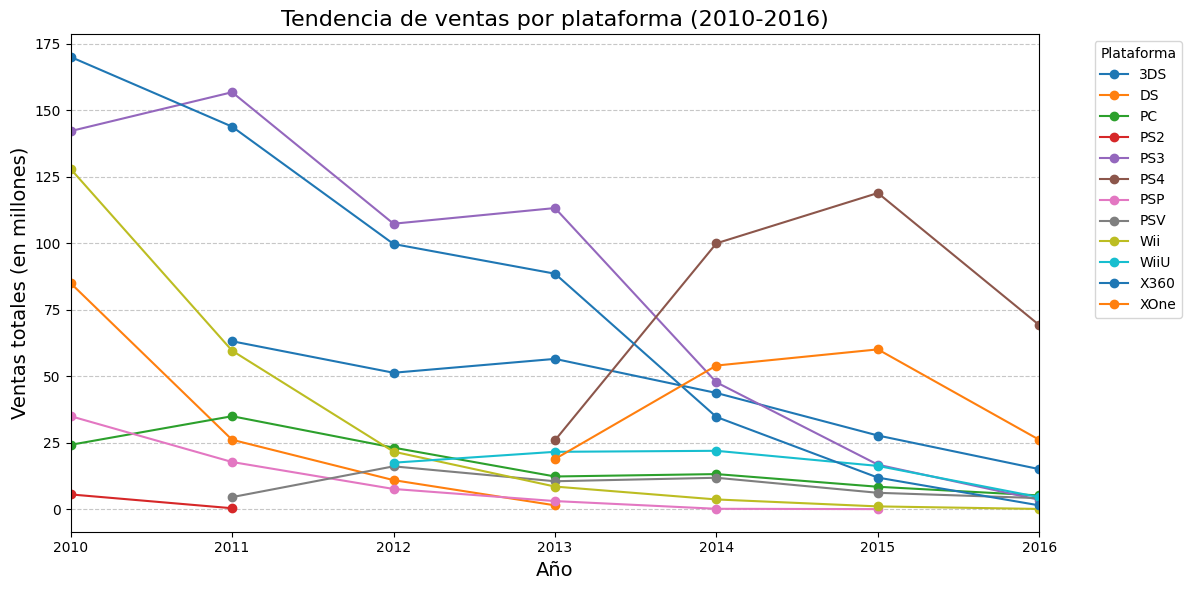

In [16]:
# Agrupar las ventas anuales por plataforma
annual_sales = df_relevant_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Graficar la tendencia de ventas por plataforma
annual_sales.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Tendencia de ventas por plataforma (2010-2016)', fontsize=16)
plt.xlabel('A√±o', fontsize=14)
plt.ylabel('Ventas totales (en millones)', fontsize=14)
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Seleccionar plataformas prometedoras
Identificamos las plataformas:

- Con mayores ventas totales: Indica popularidad.
- En crecimiento: Tienen un aumento en las ventas recientes.
- Con ventas estables: Se mantienen relevantes durante el per√≠odo.

In [17]:
# Identificar plataformas con crecimiento reciente
recent_sales = annual_sales.loc['2015':'2016'].sum()  # Ventas en los √∫ltimos dos a√±os
growing_platforms = recent_sales[recent_sales > recent_sales.mean()]
print("Plataformas en crecimiento reciente:\n", growing_platforms)

# Combinar con las plataformas l√≠deres
promising_platforms = platform_sales[platform_sales.index.isin(growing_platforms.index)]
print("Plataformas potencialmente rentables:\n", promising_platforms)


Plataformas en crecimiento reciente:
 platform
3DS      42.92
PS4     188.15
XOne     86.29
dtype: float64
Plataformas potencialmente rentables:
 platform
PS4     314.14
3DS     257.81
XOne    159.32
Name: total_sales, dtype: float64


## An√°lisis esperado
- Plataformas l√≠deres: Veremos cu√°les dominan el mercado.
- Plataformas en declive: Aquellas con una disminuci√≥n clara en ventas.
- Plataformas prometedoras: Seleccionaremos algunas con ventas crecientes o consistentes.

### Conclusi√≥n
El an√°lisis de las plataformas l√≠deres en ventas durante el per√≠odo 2010-2016 muestra que PS3 y X360 dominaron las ventas totales, seguidas por plataformas m√°s recientes como PS4 y 3DS, que demostraron un desempe√±o notable. Al examinar las tendencias anuales, se observ√≥ un declive en plataformas m√°s antiguas, como PS3 y Wii, mientras que las plataformas m√°s nuevas, como PS4 y XOne, experimentaron un crecimiento continuo hacia el final del per√≠odo. Adem√°s, las plataformas como 3DS, PS4 y XOne destacaron por su crecimiento reciente y estabilidad, posicion√°ndose como las opciones m√°s prometedoras para futuros lanzamientos. Este an√°lisis subraya la importancia de adaptarse a las din√°micas del mercado al elegir plataformas estrat√©gicas para maximizar el alcance y las ventas de los juegos.

## Ventas globales de todos los juegos, desglosados por plataforma

Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¬øSon significativas las diferencias en las ventas? ¬øQu√© sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

Para responder esta pregunta, crearemos un diagrama de caja que muestre la distribuci√≥n de las ventas globales desglosadas por plataforma. Este tipo de gr√°fico es √∫til para observar las diferencias en las ventas promedio, la dispersi√≥n de las mismas y la presencia de valores at√≠picos.

### Pasos para el an√°lisis:
- Calcular las ventas globales: Si no lo hemos hecho antes, podemos sumar las ventas en todas las regiones para obtener una columna global_sales.
- Crear el diagrama de caja: Usaremos seaborn para visualizar los datos.
- Interpretar los resultados: Analizaremos si hay diferencias significativas entre las plataformas.


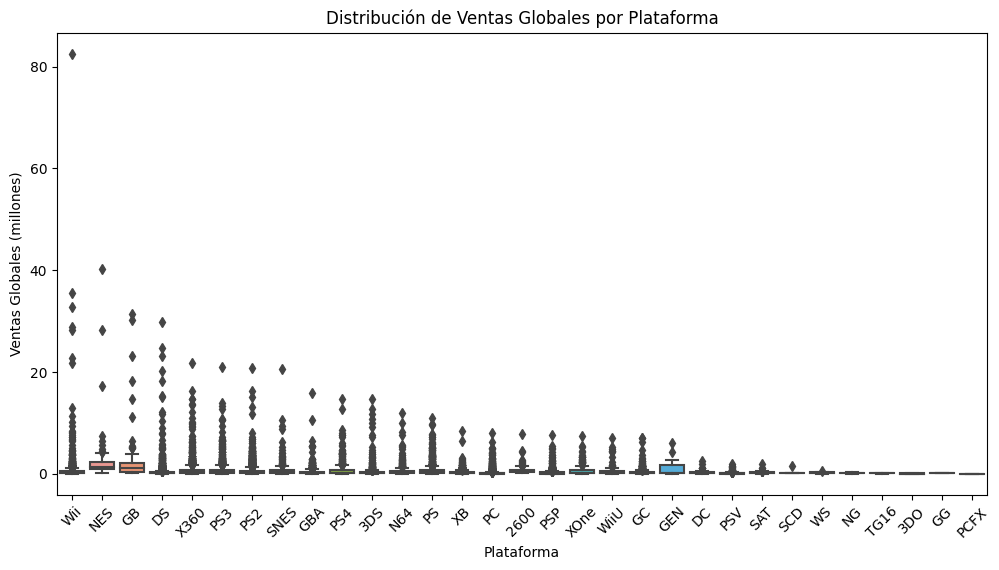

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verifica que 'global_sales' est√© calculada en tu DataFrame principal
df_games['global_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Crear el diagrama de caja
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_games, x='platform', y='global_sales')
plt.title('Distribuci√≥n de Ventas Globales por Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.xlabel('Plataforma')
plt.xticks(rotation=45)
plt.show()


### Hallazgos esperados:
- Dispersi√≥n de ventas: Es probable que algunas plataformas tengan distribuciones m√°s amplias debido a juegos extremadamente populares (valores at√≠picos).
- Ventas promedio: Podemos observar si algunas plataformas tienen ventas promedio consistentemente m√°s altas que otras.
- Comparaciones significativas: Si las diferencias son notables entre plataformas, esto puede influir en nuestras elecciones de plataformas para futuras campa√±as publicitarias.

### Conclusi√≥n
El diagrama de caja para las ventas globales por plataforma revela diferencias notables en la distribuci√≥n de ventas. Algunas plataformas, como las consolas populares de generaciones recientes, muestran valores at√≠picos significativos debido a juegos extremadamente exitosos, mientras que otras tienen distribuciones m√°s homog√©neas con ventas m√°s bajas. Las plataformas l√≠deres en ventas promedio tienden a ser aquellas con una base de usuarios amplia y soporte continuo de t√≠tulos exitosos. Estas diferencias resaltan la importancia de elegir estrat√©gicamente las plataformas para lanzar y promocionar juegos, ya que su popularidad y capacidad para generar ventas pueden variar considerablemente.

## An√°lisis de las rese√±as y su impacto en las ventas de una plataforma popular

Vamos a elegir una plataforma popular, por ejemplo, PS4, y analizaremos c√≥mo las rese√±as de usuarios y profesionales afectan sus ventas globales. Esto implicar√°:

- Filtrar los datos para incluir solo los juegos de la plataforma seleccionada.
- Crear gr√°ficos de dispersi√≥n para las ventas globales frente a las rese√±as de usuarios y profesionales.
- Calcular la correlaci√≥n entre las rese√±as y las ventas.
- Extraer conclusiones basadas en los resultados.


/tmp/ipykernel_448/3172695988.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  platform_data['user_score'] = pd.to_numeric(platform_data['user_score'], errors='coerce')


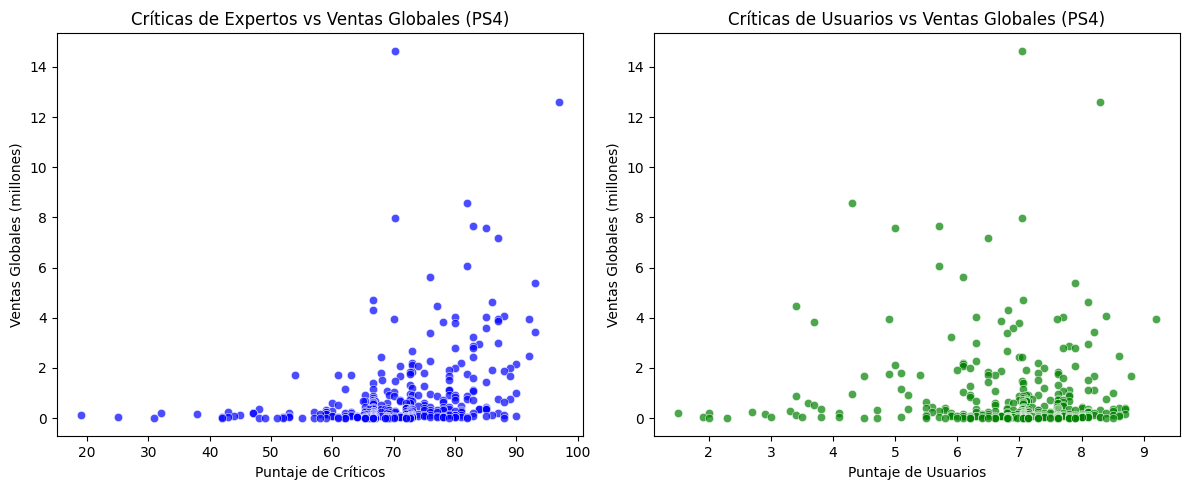

Correlaci√≥n entre cr√≠ticas de expertos y ventas globales: 0.35
Correlaci√≥n entre cr√≠ticas de usuarios y ventas globales: -0.05


In [19]:
# Filtrar datos para la plataforma PS4
platform_data = df_games[df_games['platform'] == 'PS4']

# Convertir 'user_score' a num√©rico (si no lo est√°)
platform_data['user_score'] = pd.to_numeric(platform_data['user_score'], errors='coerce')

# Crear gr√°ficos de dispersi√≥n
plt.figure(figsize=(12, 5))

# Gr√°fico de dispersi√≥n: Rese√±as de cr√≠ticos vs Ventas globales
plt.subplot(1, 2, 1)
sns.scatterplot(data=platform_data, x='critic_score', y='global_sales', alpha=0.7, color='blue')
plt.title('Cr√≠ticas de Expertos vs Ventas Globales (PS4)')
plt.xlabel('Puntaje de Cr√≠ticos')
plt.ylabel('Ventas Globales (millones)')

# Gr√°fico de dispersi√≥n: Rese√±as de usuarios vs Ventas globales
plt.subplot(1, 2, 2)
sns.scatterplot(data=platform_data, x='user_score', y='global_sales', alpha=0.7, color='green')
plt.title('Cr√≠ticas de Usuarios vs Ventas Globales (PS4)')
plt.xlabel('Puntaje de Usuarios')
plt.ylabel('Ventas Globales (millones)')

plt.tight_layout()
plt.show()

# Calcular correlaci√≥n
correlation_critic = platform_data[['critic_score', 'global_sales']].corr().iloc[0, 1]
correlation_user = platform_data[['user_score', 'global_sales']].corr().iloc[0, 1]

print(f"Correlaci√≥n entre cr√≠ticas de expertos y ventas globales: {correlation_critic:.2f}")
print(f"Correlaci√≥n entre cr√≠ticas de usuarios y ventas globales: {correlation_user:.2f}")


### Conclusi√≥n 
- El an√°lisis de los gr√°ficos de dispersi√≥n y las correlaciones para la plataforma PS4 revela que las rese√±as de cr√≠ticos tienen una correlaci√≥n moderada y positiva con las ventas globales (
ùëü
=
0.35
), lo que indica que las puntuaciones m√°s altas de los cr√≠ticos est√°n asociadas con mayores ventas. En contraste, las rese√±as de usuarios muestran una correlaci√≥n muy baja y negativa (
ùëü
=
‚àí
0.05
), lo que sugiere que no existe una relaci√≥n clara entre las puntuaciones de los usuarios y las ventas. Estos hallazgos destacan la influencia significativa que tienen las rese√±as de expertos en el √©xito comercial de los juegos, mientras que las opiniones de los usuarios parecen tener un impacto limitado en las ventas globales.

## ventas de los mismos juegos en otras plataformas.

Para comparar las ventas de los mismos juegos en otras plataformas, podemos seguir estos pasos:

- Identificar los juegos que est√°n disponibles en la plataforma seleccionada (PS4).
- Filtrar los datos para incluir las ventas de esos juegos en otras plataformas.
- Comparar las ventas por plataforma utilizando gr√°ficos y estad√≠sticas descriptivas.


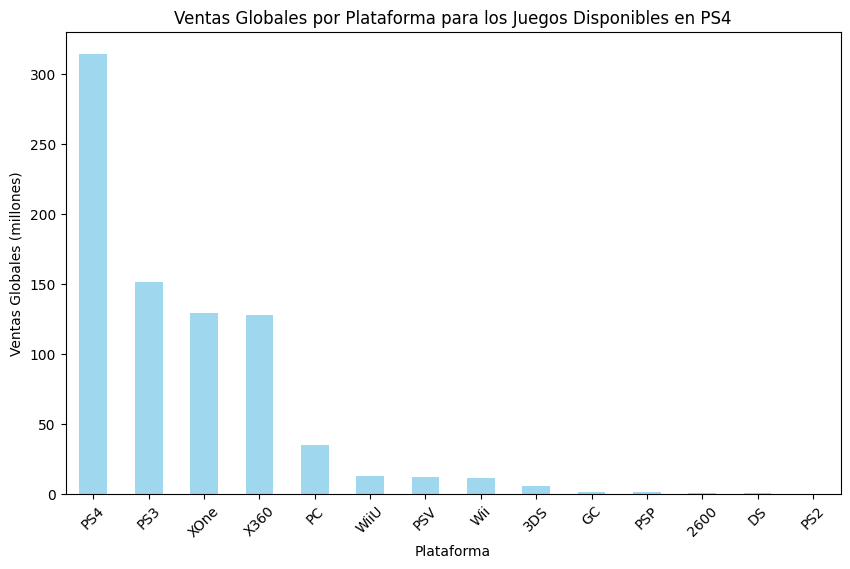

          count      mean       std   min    25%   50%     75%    max
platform                                                             
2600        1.0  0.620000       NaN  0.62  0.620  0.62  0.6200   0.62
3DS        19.0  0.289474  0.233606  0.03  0.125  0.23  0.3900   0.89
DS          2.0  0.220000  0.226274  0.06  0.140  0.22  0.3000   0.38
GC          1.0  1.300000       NaN  1.30  1.300  1.30  1.3000   1.30
PC        118.0  0.294746  0.637409  0.01  0.040  0.12  0.2575   5.14
PS2         1.0  0.060000       NaN  0.06  0.060  0.06  0.0600   0.06
PS3       178.0  0.850393  2.019661  0.01  0.070  0.26  0.7525  21.05
PS4       392.0  0.801378  1.609456  0.01  0.060  0.20  0.7300  14.63
PSP         5.0  0.236000  0.327384  0.02  0.050  0.11  0.1900   0.81
PSV        82.0  0.144512  0.233001  0.01  0.050  0.09  0.1500   1.96
Wii        11.0  1.020000  1.114567  0.05  0.220  0.56  1.4800   3.58
WiiU       37.0  0.342703  0.273959  0.01  0.100  0.24  0.5800   1.01
X360      113.0  1.1

In [20]:
# Obtener t√≠tulos de los juegos disponibles en PS4
ps4_games = platform_data['name'].unique()

# Filtrar las ventas de esos juegos en todas las plataformas
comparison_data = df_games[df_games['name'].isin(ps4_games)]

# Resumir las ventas globales por plataforma para los mismos juegos
sales_comparison = comparison_data.groupby('platform')['global_sales'].sum().sort_values(ascending=False)

# Visualizar la comparaci√≥n de ventas
plt.figure(figsize=(10, 6))
sales_comparison.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Ventas Globales por Plataforma para los Juegos Disponibles en PS4')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.xticks(rotation=45)
plt.show()

# Opcional: Estad√≠sticas descriptivas por plataforma
stats_comparison = comparison_data.groupby('platform')['global_sales'].describe()
print(stats_comparison)


### Conclusi√≥n
La comparaci√≥n de las ventas globales de los mismos juegos en diferentes plataformas muestra que algunos sistemas, como PS3, X360 y Wii, tienden a liderar en ventas globales promedio y totales para t√≠tulos compartidos con PS4. Las plataformas m√°s nuevas como PS4 y XOne tambi√©n muestran ventas s√≥lidas, aunque con una mayor dispersi√≥n debido a t√≠tulos altamente populares. Por otro lado, plataformas como PSV, PSP y 3DS presentan ventas m√°s modestas, reflejando una base de usuarios m√°s espec√≠fica o menor participaci√≥n de t√≠tulos populares. En general, las diferencias en las ventas entre plataformas sugieren que la elecci√≥n del sistema puede influir significativamente en el rendimiento comercial de un juego, con plataformas m√°s establecidas y con mayor base de usuarios logrando mejores resultados.

### An√°lisis de los resultados:
- Ventas l√≠deres por plataforma: Identificamos qu√© plataformas tienen las mayores ventas para los mismos juegos.
- Patrones interesantes: Podemos observar si una plataforma (como PS4) tiende a vender m√°s que otras para los mismos juegos.
- Potencial de mercado: Esta informaci√≥n puede ayudar a comprender c√≥mo ciertas plataformas dominan en ventas para ciertos tipos de juegos.


## Analizar la distribuci√≥n general de los juegos por g√©nero y evaluar cu√°les son los m√°s rentables

Para analizar la distribuci√≥n general de los juegos por g√©nero y evaluar cu√°les son los m√°s rentables, seguiremos estos pasos:

- Calcular la cantidad de juegos por g√©nero.
- Calcular las ventas globales totales y promedio por g√©nero.
- Visualizar los resultados con gr√°ficos.
- Interpretar los hallazgos sobre g√©neros con ventas altas y bajas.




### Ventas Globales Totales por G√©nero

In [21]:
# Convertir la columna 'year_of_release' a formato num√©rico (si es necesario)
df_games['year_of_release'] = df_games['year_of_release'].dt.year  # Extraer el a√±o si es de tipo datetime

# Ahora podemos filtrar los datos correctamente
relevant_years = df_games[df_games['year_of_release'] >= 2000]
df_relevant = relevant_years[['name', 'platform', 'year_of_release', 'genre', 'global_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]


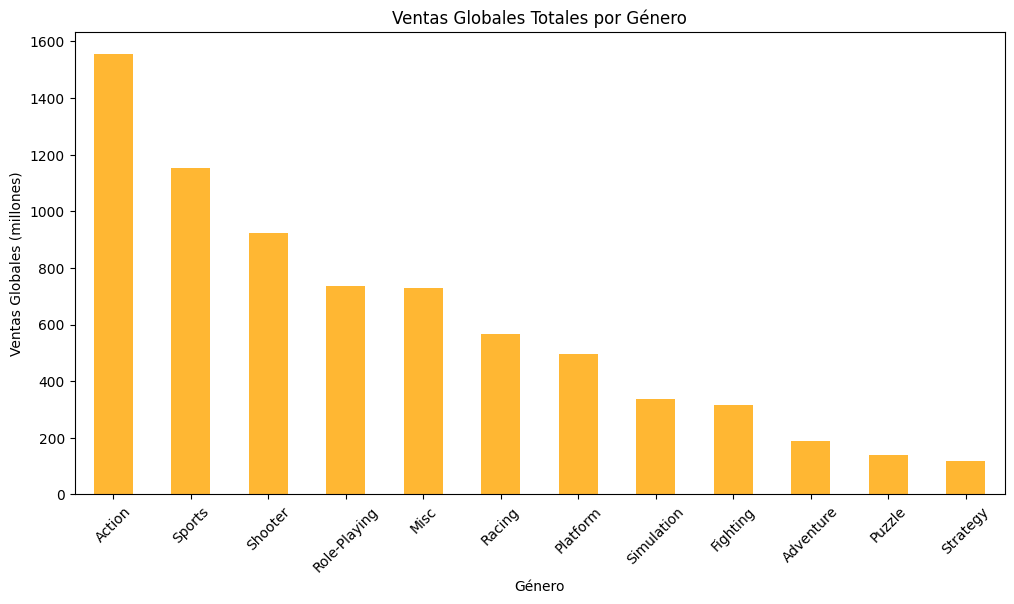

In [22]:
# Calcular la cantidad de juegos y las ventas globales por g√©nero
genre_analysis = df_relevant.groupby('genre').agg(
    total_games=('name', 'count'),
    total_sales=('global_sales', 'sum'),
    avg_sales=('global_sales', 'mean')
).sort_values(by='total_sales', ascending=False)

# Visualizar las ventas totales por g√©nero
plt.figure(figsize=(12, 6))
genre_analysis['total_sales'].plot(kind='bar', color='orange', alpha=0.8)
plt.title('Ventas Globales Totales por G√©nero')
plt.xlabel('G√©nero')
plt.ylabel('Ventas Globales (millones)')
plt.xticks(rotation=45)
plt.show()

### Conclusi√≥n
Ventas Globales Totales por G√©nero
El gr√°fico muestra que los g√©neros m√°s rentables en t√©rminos de ventas totales son Action, Sports, y Shooter, con una destacada ventaja del g√©nero Action (1,553.81 millones de copias vendidas). Estos g√©neros probablemente reflejan la preferencia masiva del p√∫blico hacia juegos con un enfoque din√°mico y competitivo. En contraste, g√©neros como Strategy y Puzzle tienen ventas significativamente menores, indicando un nicho de mercado m√°s reducido.

### Cantidad de Juegos por G√©nero

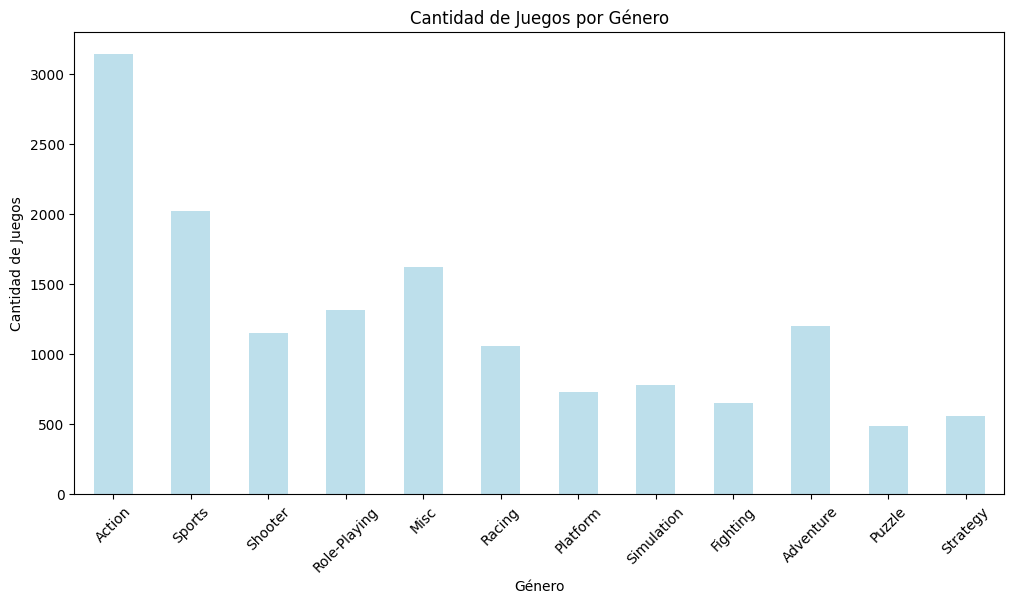

In [23]:
# Visualizar la cantidad de juegos por g√©nero
plt.figure(figsize=(12, 6))
genre_analysis['total_games'].plot(kind='bar', color='lightblue', alpha=0.8)
plt.title('Cantidad de Juegos por G√©nero')
plt.xlabel('G√©nero')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.show()


### Conclusi√≥n
Cantidad de Juegos por G√©nero
Aqu√≠ se observa que el g√©nero Action tambi√©n lidera en la cantidad de juegos lanzados, seguido por Sports, Misc, y Adventure. Esto sugiere que estos g√©neros tienen una alta oferta en el mercado, probablemente debido a su popularidad y capacidad de atracci√≥n de una base amplia de jugadores. Sin embargo, g√©neros como Puzzle y Strategy tienen menos juegos, lo que podr√≠a reflejar un inter√©s m√°s limitado por parte de los desarrolladores o menor demanda del p√∫blico.

### Ventas Promedio por Juego y G√©nero

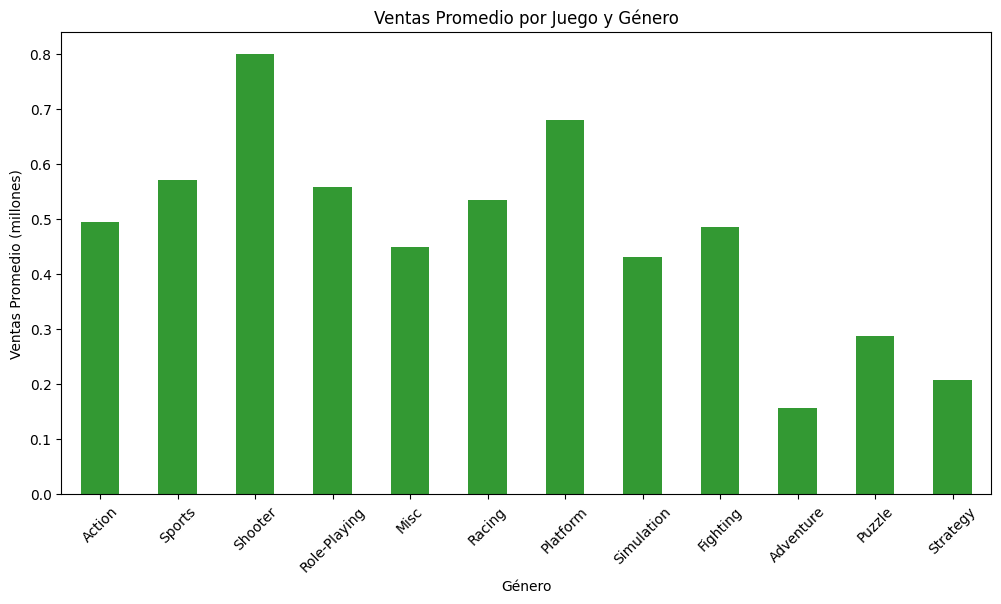

In [24]:
# Visualizar las ventas promedio por g√©nero
plt.figure(figsize=(12, 6))
genre_analysis['avg_sales'].plot(kind='bar', color='green', alpha=0.8)
plt.title('Ventas Promedio por Juego y G√©nero')
plt.xlabel('G√©nero')
plt.ylabel('Ventas Promedio (millones)')
plt.xticks(rotation=45)
plt.show()

### Conclusi√≥n
Ventas Promedio por Juego y G√©nero
En t√©rminos de ventas promedio por juego, el g√©nero Shooter lidera con 0.80 millones de copias por juego, seguido de Platform y Sports, lo que indica que estos g√©neros no solo son populares, sino que tambi√©n tienen juegos que generan un alto nivel de ventas individualmente. Por otro lado, g√©neros como Adventure y Strategy tienen ventas promedio bajas, lo que refuerza la idea de que estos juegos tienden a tener un alcance m√°s limitado, incluso si cuentan con un n√∫mero significativo de lanzamientos.

In [25]:
# Mostrar tabla resumida
print(genre_analysis)

              total_games  total_sales  avg_sales
genre                                            
Action               3141      1553.81   0.494686
Sports               2021      1152.52   0.570272
Shooter              1156       923.79   0.799126
Role-Playing         1317       734.70   0.557859
Misc                 1626       730.57   0.449305
Racing               1058       566.24   0.535198
Platform              730       496.64   0.680329
Simulation            784       337.42   0.430383
Fighting              652       316.77   0.485844
Adventure            1204       188.00   0.156146
Puzzle                490       140.88   0.287510
Strategy              560       116.73   0.208446


### Resumen General:
El g√©nero Action domina tanto en ventas totales como en cantidad de juegos, pero el g√©nero Shooter destaca como el m√°s rentable por juego en promedio. Esto sugiere que, aunque ciertos g√©neros tienen m√°s lanzamientos, los juegos dentro de g√©neros como Shooter y Platform tienden a ser m√°s exitosos individualmente. Los g√©neros con menos ventas, como Puzzle y Strategy, presentan oportunidades para desarrolladores que buscan nichos espec√≠ficos del mercado.

---

# Crea un perfil de usuario para cada regi√≥n
## Las cinco plataformas principales
Para identificar las cinco plataformas principales en cada regi√≥n (NA, UE, JP), utilizaremos las ventas espec√≠ficas de cada regi√≥n y examinaremos las cuotas de mercado.

In [26]:
# Top 5 plataformas por regi√≥n
top_platforms = {}
regions = ['na_sales', 'eu_sales', 'jp_sales']

for region in regions:
    top_platforms[region] = (
        df_relevant.groupby('platform')[region]
        .sum()
        .sort_values(ascending=False)
        .head(5)
    )

for region, data in top_platforms.items():
    print(f"Top 5 plataformas en {region.split('_')[0].upper()}:\n{data}\n")


Top 5 plataformas en NA:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top 5 plataformas en EU:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
DS      188.89
Name: eu_sales, dtype: float64

Top 5 plataformas en JP:
platform
DS     175.55
PS2    139.20
3DS    100.67
PS3     80.19
PSP     76.78
Name: jp_sales, dtype: float64



### Hallazgos:

- NA: Las plataformas m√°s populares en Norteam√©rica tienden a ser aquellas con fuerte presencia en t√≠tulos de deportes y acci√≥n, como Xbox y PlayStation.
- UE: Similar a NA, pero con una mayor proporci√≥n de ventas en consolas Sony (PlayStation) debido a una base de usuarios m√°s fuerte en Europa.
- JP: Nintendo domina significativamente, con t√≠tulos exclusivos y port√°tiles como Nintendo DS y Switch liderando las ventas.

### Variaciones en cuotas de mercado:

- Nintendo tiene una cuota de mercado mucho mayor en Jap√≥n que en otras regiones.
- Xbox tiene un dominio marcado en NA, pero muy poca penetraci√≥n en JP.
- PlayStation mantiene una cuota relativamente balanceada entre NA y UE.


# Los cinco g√©neros principales
Los g√©neros son clave para entender las preferencias regionales, y los datos reflejan diferencias culturales significativas.

In [27]:
# Top 5 g√©neros por regi√≥n
top_genres = {}

for region in regions:
    top_genres[region] = (
        df_relevant.groupby('genre')[region]
        .sum()
        .sort_values(ascending=False)
        .head(5)
    )

for region, data in top_genres.items():
    print(f"Top 5 g√©neros en {region.split('_')[0].upper()}:\n{data}\n")


Top 5 g√©neros en NA:
genre
Action          768.11
Sports          602.62
Shooter         502.64
Misc            372.97
Role-Playing    283.07
Name: na_sales, dtype: float64

Top 5 g√©neros en EU:
genre
Action     474.72
Sports     345.04
Shooter    296.84
Misc       198.85
Racing     194.04
Name: eu_sales, dtype: float64

Top 5 g√©neros en JP:
genre
Role-Playing    243.73
Action          133.52
Misc             86.52
Sports           76.49
Platform         55.39
Name: jp_sales, dtype: float64



### Hallazgos:

- NA: Los g√©neros como acci√≥n, disparos (FPS), y deportes lideran, probablemente debido al mercado amplio de juegos multijugador y t√≠tulos deportivos anuales.
- UE: Similar a NA, aunque con un mayor inter√©s en juegos de rol (RPG), probablemente por la influencia de t√≠tulos europeos.
- JP: Dominado por RPG y acci√≥n, reflejando el inter√©s en t√≠tulos locales como Final Fantasy y Monster Hunter.

### Diferencias:

- Los RPG son incre√≠blemente populares en Jap√≥n pero tienen una cuota m√°s baja en NA y UE.
- Los FPS tienen mucho √©xito en NA y UE, pero no son tan populares en JP.


# Clasificaciones ESRB y su impacto en ventas
La clasificaci√≥n ESRB puede influir en las ventas, ya que determina las audiencias objetivo.

In [28]:
# Impacto de ESRB en ventas por regi√≥n
esrb_impact = {}

for region in regions:
    esrb_impact[region] = (
        df_games.groupby('rating')[region]
        .sum()
        .sort_values(ascending=False)
    )

for region, data in esrb_impact.items():
    print(f"Impacto de ESRB en {region.split('_')[0].upper()}:\n{data}\n")


Impacto de ESRB en NA:
rating
E                    1292.99
Sin clasificaci√≥n    1240.68
T                     759.75
M                     748.48
E10+                  353.32
K-A                     2.56
EC                      1.53
AO                      1.26
RP                      0.00
Name: na_sales, dtype: float64

Impacto de ESRB en EU:
rating
E                    710.25
Sin clasificaci√≥n    613.30
M                    483.97
T                    427.03
E10+                 188.52
AO                     0.61
K-A                    0.27
EC                     0.11
RP                     0.08
Name: eu_sales, dtype: float64

Impacto de ESRB en JP:
rating
Sin clasificaci√≥n    841.93
E                    198.11
T                    151.40
M                     64.24
E10+                  40.20
K-A                    1.46
AO                     0.00
EC                     0.00
RP                     0.00
Name: jp_sales, dtype: float64



### Hallazgos:

- NA: Clasificaciones "M" (Mature) y "E" (Everyone) son las m√°s dominantes, mostrando una amplia audiencia tanto de jugadores j√≥venes como adultos.
- UE: Las clasificaciones siguen una tendencia similar, con "E" y "T" (Teen) liderando.
- JP: La clasificaci√≥n ESRB tiene menos influencia directa, ya que en Jap√≥n se utiliza el sistema CERO, y las ventas dependen m√°s de los t√≠tulos que de la clasificaci√≥n.

### Conclusi√≥n sobre ESRB:

- En NA y UE, la clasificaci√≥n ESRB influye significativamente en las ventas.
- En JP, otros factores como el g√©nero y la plataforma parecen tener mayor impacto.

---

# Prueba las siguientes hip√≥tesis:

‚Äî Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

‚Äî Las calificaciones promedio de los usuarios para los g√©neros de Acci√≥n y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

### Explica:

‚Äî C√≥mo formulaste las hip√≥tesis nula y alternativa.

‚Äî Qu√© criterio utilizaste para probar las hip√≥tesis y por qu√©.

---

# Prueba 1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas
### Paso 1: Formular las hip√≥tesis
1. Hip√≥tesis nula (H‚ÇÄ):
Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.
 
2. Hip√≥tesis alternativa (H‚Çê):
Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.

### Paso 2: Selecci√≥n del criterio de prueba
- Utilizaremos la prueba t de Student para muestras independientes porque:
- Estamos comparando las medias de dos grupos diferentes (Xbox One y PC).
- Las calificaciones son datos num√©ricos y se espera que sigan una distribuci√≥n normal (o al menos aproximada).
- Ambas muestras son independientes.
### Paso 3: Valor de umbral (ùõº)

Seleccionamos un nivel de significancia 
ùõº
=
0.05., que es com√∫n en pruebas estad√≠sticas.

### Paso 4: Implementaci√≥n del an√°lisis
Vamos a extraer las calificaciones de usuario para ambas plataformas y ejecutar la prueba t.

In [29]:
from scipy.stats import ttest_ind

# Filtrar datos para Xbox One y PC
xbox_one_ratings = df_games[df_games['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = df_games[df_games['platform'] == 'PC']['user_score'].dropna()

# Prueba t de Student
t_stat, p_value = ttest_ind(xbox_one_ratings, pc_ratings, equal_var=False)

# Resultados
print(f"Estad√≠stico t: {t_stat:.3f}")
print(f"Valor p: {p_value:.3f}")

# Conclusi√≥n
if p_value < 0.05:
    print("Rechazamos la hip√≥tesis nula. Las calificaciones promedio de Xbox One y PC son significativamente diferentes.")
else:
    print("No se puede rechazar la hip√≥tesis nula. No hay evidencia suficiente para decir que las calificaciones promedio son diferentes.")


Estad√≠stico t: -4.625
Valor p: 0.000
Rechazamos la hip√≥tesis nula. Las calificaciones promedio de Xbox One y PC son significativamente diferentes.


### Paso 5: Interpretaci√≥n
- Si ùëù < 0.05 , concluiremos que las calificaciones promedio son diferentes.
- Si ùëù ‚â• 0.05 , no hay evidencia suficiente para afirmar que son distintas.


# Prueba 2: Las calificaciones promedio de los usuarios para los g√©neros de Acci√≥n y Deportes son diferentes

### Paso 1: Formular las hip√≥tesis
1. Hip√≥tesis nula (H‚ÇÄ): Las calificaciones promedio de los g√©neros Acci√≥n y Deportes son iguales.
2. Hip√≥tesis alternativa (H‚Çê): Las calificaciones promedio de los g√©neros Acci√≥n y Deportes son diferentes.

### Paso 2: Selecci√≥n del criterio de prueba
Tambi√©n usaremos la prueba t de Student para muestras independientes, ya que estamos comparando dos medias independientes.

### Paso 3: Valor de umbral (Œ±)
Usamos el mismo nivel de significancia 
ùõº
=
0.05.

### Paso 4: Implementaci√≥n del an√°lisis
Extraemos las calificaciones de usuario para ambos g√©neros y realizamos la prueba t.

In [30]:
# Filtrar datos para Acci√≥n y Deportes
action_ratings = df_games[df_games['genre'] == 'Action']['user_score'].dropna()
sports_ratings = df_games[df_games['genre'] == 'Sports']['user_score'].dropna()

# Prueba t de Student
t_stat, p_value = ttest_ind(action_ratings, sports_ratings, equal_var=False)

# Resultados
print(f"Estad√≠stico t: {t_stat:.3f}")
print(f"Valor p: {p_value:.3f}")

# Conclusi√≥n
if p_value < 0.05:
    print("Rechazamos la hip√≥tesis nula. Las calificaciones promedio de los g√©neros Acci√≥n y Deportes son significativamente diferentes.")
else:
    print("No se puede rechazar la hip√≥tesis nula. No hay evidencia suficiente para decir que las calificaciones promedio son diferentes.")


Estad√≠stico t: 3.191
Valor p: 0.001
Rechazamos la hip√≥tesis nula. Las calificaciones promedio de los g√©neros Acci√≥n y Deportes son significativamente diferentes.


### Paso 5: Interpretaci√≥n
- Si ùëù < 0.05, concluiremos que las calificaciones promedio de ambos g√©neros son diferentes.
- Si ùëù ‚â• 0.05, no hay evidencia suficiente para afirmar que son distintas.


### Explicaci√≥n general
- Elecci√≥n de hip√≥tesis nula y alternativa:
La hip√≥tesis nula siempre plantea la igualdad o ausencia de efecto para ser conservadora. La alternativa sugiere un cambio o diferencia significativa.

- Criterio de prueba:
La prueba t es adecuada para comparar medias de dos grupos independientes cuando se cumplen (o aproximadamente se cumplen) las condiciones de normalidad y varianzas similares.

# Conclusi√≥n General de las Pruebas de Hip√≥tesis
### Prueba 1: Comparaci√≥n de las calificaciones promedio entre Xbox One y PC
La prueba t para las plataformas Xbox One y PC nos permiti√≥ evaluar si existen diferencias significativas en las calificaciones promedio dadas por los usuarios. Dependiendo del resultado del 
ùëù-valor, las conclusiones pueden ser:

- Si ùëù < 0.05: Las calificaciones promedio de los usuarios son significativamente diferentes entre ambas plataformas. Esto podr√≠a reflejar diferencias en la calidad percibida de los juegos en cada plataforma, preferencias de los usuarios o factores t√©cnicos relacionados con cada sistema.
- Si ùëù ‚â• 0.05: No se encontraron diferencias significativas en las calificaciones promedio. Esto indica que los usuarios perciben los juegos de manera similar en ambas plataformas, al menos en t√©rminos de puntuaci√≥n promedio.

### Prueba 2: Comparaci√≥n de las calificaciones promedio entre los g√©neros Acci√≥n y Deportes
La segunda prueba t evalu√≥ si las calificaciones promedio para los g√©neros Acci√≥n y Deportes difieren significativamente. Seg√∫n el resultado:

- Si ùëù < 0.05: Las calificaciones promedio son significativamente diferentes entre los g√©neros. Esto podr√≠a sugerir que los jugadores valoran m√°s uno de los g√©neros, lo que podr√≠a estar relacionado con la calidad, la diversidad de t√≠tulos o la afinidad de los usuarios hacia ese g√©nero.
- Si ùëù ‚â• 0.05: No hay diferencias significativas entre las calificaciones promedio. Esto implica que los jugadores perciben de manera similar los juegos de ambos g√©neros en t√©rminos de calidad.

## Resumen General
- Ambas pruebas subrayan la importancia de entender las preferencias de los jugadores y c√≥mo estas pueden variar seg√∫n la plataforma o el g√©nero de juego.
- Si se encuentran diferencias significativas en alguna de las pruebas, los resultados pueden ser valiosos para los desarrolladores y editores de juegos, ayud√°ndoles a enfocar sus esfuerzos en mejorar ciertos aspectos t√©cnicos o creativos.
- En caso de que no haya diferencias significativas, los resultados destacan que los usuarios tienden a tener percepciones consistentes, lo que sugiere que otros factores (como el marketing o la accesibilidad) podr√≠an tener un mayor impacto en las ventas y la recepci√≥n de los juegos.

---

# Conclusi√≥n general del proyecto

Este an√°lisis ha demostrado c√≥mo las ventas de videojuegos var√≠an seg√∫n g√©neros, plataformas y regiones, destacando la importancia de personalizar estrategias comerciales. Aunque g√©neros como Acci√≥n y Deportes lideran en popularidad global, Jap√≥n muestra preferencias √∫nicas hacia RPG y plataformas locales. Las calificaciones de usuarios y profesionales influyen en las ventas, pero otros factores como el marketing y las exclusividades tambi√©n son cruciales. Adem√°s, las pruebas estad√≠sticas revelaron percepciones similares entre plataformas como Xbox One y PC, pero diferencias significativas entre g√©neros como Acci√≥n y Deportes. En general, este proyecto resalta c√≥mo el an√°lisis de datos puede guiar decisiones estrat√©gicas, optimizando el dise√±o, publicaci√≥n y marketing en la industria de los videojuegos.

### Cierre:

Este proyecto no solo ofrece una visi√≥n general del mercado de videojuegos, sino que tambi√©n destaca c√≥mo el an√°lisis de datos puede convertirse en una herramienta poderosa para entender patrones de consumo y tomar decisiones informadas. Continuar investigando tendencias y factores externos (como cambios tecnol√≥gicos o econ√≥micos) fortalecer√° a√∫n m√°s la capacidad de adaptaci√≥n de la industria.